In [1]:
# 기본 packages loading
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 분석할 데이터 셋 로딩
input_1 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_01.csv')
target_1 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_01.csv')
input_2 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_2.csv')
target_2 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_2.csv')
input_3 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_3.csv')
target_3 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_3.csv')
input_4 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_4.csv')
target_4 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_4.csv')
input_5 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_5.csv')
target_5 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_5.csv')
input_6 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_6.csv')
target_6 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_6.csv')
input_7 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_7.csv')
target_7 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_7.csv')
input_8 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_8.csv')
target_8 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_8.csv')

# 데이터 전처리 완료

In [11]:
# 결측치 2개
input_1.isnull().sum()

시간               0
내부온도관측치          2
내부습도관측치          2
CO2관측치           2
EC관측치            2
외부온도관측치          2
외부습도관측치          2
펌프상태             2
펌프작동남은시간         2
최근분무량            2
일간누적분무량          2
냉방상태             2
냉방작동남은시간         2
난방상태             2
난방작동남은시간         2
내부유동팬상태          2
내부유동팬작동남은시간      2
외부환기팬상태          2
외부환기팬작동남은시간      2
화이트 LED상태        2
화이트 LED작동남은시간    2
화이트 LED동작강도      2
레드 LED상태         2
레드 LED작동남은시간     2
레드 LED동작강도       2
블루 LED상태         2
블루 LED작동남은시간     2
블루 LED동작강도       2
카메라상태            2
냉방온도             2
난방온도             2
기준온도             2
난방부하             2
냉방부하             2
총추정광량            2
백색광추정광량          2
적색광추정광량          2
청색광추정광량          2
dtype: int64

In [10]:
# 결측치 1개, 2,4,6,7,8
input_9.isnull().sum()

시간                 0
내부온도관측치          228
내부습도관측치          228
CO2관측치           228
EC관측치            228
외부온도관측치          228
외부습도관측치          228
펌프상태             228
펌프작동남은시간         228
최근분무량            228
일간누적분무량          228
냉방상태             228
냉방작동남은시간         228
난방상태             228
난방작동남은시간         228
내부유동팬상태          228
내부유동팬작동남은시간      228
외부환기팬상태          228
외부환기팬작동남은시간      228
화이트 LED상태        228
화이트 LED작동남은시간    228
화이트 LED동작강도      228
레드 LED상태         228
레드 LED작동남은시간     228
레드 LED동작강도       228
블루 LED상태         228
블루 LED작동남은시간     228
블루 LED동작강도       228
카메라상태            228
냉방온도             228
난방온도             228
기준온도             228
난방부하             228
냉방부하             228
총추정광량            228
백색광추정광량          228
적색광추정광량          228
청색광추정광량          228
dtype: int64

In [19]:
input_3.shape # 다른 데이터와 달리 27일까지 존재

(38880, 38)

In [41]:
input_1.info(), target_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41760 entries, 0 to 41759
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          41760 non-null  object 
 1   in_temp       41760 non-null  float64
 2   in_hum        41760 non-null  float64
 3   Co2           41760 non-null  float64
 4   EC            41760 non-null  float64
 5   out_temp      41760 non-null  float64
 6   out_hum       41760 non-null  float64
 7   pump_stat     41760 non-null  float64
 8   pump_rest     41760 non-null  float64
 9   r_sprayVol    41760 non-null  float64
 10  d_sprayVol    41760 non-null  float64
 11  cool_stat     41760 non-null  float64
 12  cool_rest     41760 non-null  float64
 13  heat_stat     41760 non-null  float64
 14  heat_rest     41760 non-null  float64
 15  in_fan        41760 non-null  float64
 16  in_fen_rest   41760 non-null  float64
 17  out_fan       41760 non-null  float64
 18  out_fan_rest  41760 non-nu

(None, None)

range(1, 8)

In [28]:
#1. 컬럼명 수정
input_1.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']
input_2.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']

input_3.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']
input_4.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']

In [29]:
input_5.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']
input_6.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']
input_7.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']
input_8.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']

In [44]:
# time 속성 제외한 데이터 빼오기
data1 = input_1.drop(['time'], axis=1, inplace=False)
data2 = input_2.drop(['time'], axis=1, inplace=False)
data3 = input_3.drop(['time'], axis=1, inplace=False)
data4 = input_4.drop(['time'], axis=1, inplace=False)
data5 = input_5.drop(['time'], axis=1, inplace=False)
data6 = input_6.drop(['time'], axis=1, inplace=False)
data7 = input_7.drop(['time'], axis=1, inplace=False)
data8 = input_8.drop(['time'], axis=1, inplace=False)

In [45]:
# 결측치 대체
data1[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']]=data1[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].fillna(data1[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].median())
data2[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']]=data2[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].fillna(data2[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].median())
data3[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']]=data3[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].fillna(data3[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].median())
data4[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']]=data4[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].fillna(data4[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].median())
data5[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']]=data5[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].fillna(data5[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].median())
data6[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']]=data6[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].fillna(data6[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].median())
data7[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']]=data7[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].fillna(data7[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].median())
data8[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']]=data8[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].fillna(data8[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].median())

In [46]:
data1 = data1.fillna(data1.mean())
data2 = data2.fillna(data2.mean())
data3 = data3.fillna(data3.mean())
data4 = data4.fillna(data4.mean())
data5 = data5.fillna(data5.mean())
data6 = data6.fillna(data6.mean())
data7 = data7.fillna(data7.mean())
data8 = data8.fillna(data8.mean())

In [47]:
# 전환용 함수정의
def day_mean1(x,y):
    a = data1[1140 * x : 1140 * y].mean()
    df1.loc[x] = a.to_list()
def day_mean2(x,y):
    a = data2[1140 * x : 1140 * y].mean()
    df2.loc[x] = a.to_list()
def day_mean3(x,y):
    a = data3[1140 * x : 1140 * y].mean()
    df3.loc[x] = a.to_list()
def day_mean4(x,y):
    a = data4[1140 * x : 1140 * y].mean()
    df4.loc[x] = a.to_list()
def day_mean5(x,y):
    a = data5[1140 * x : 1140 * y].mean()
    df5.loc[x] = a.to_list()
def day_mean6(x,y):
    a = data6[1140 * x : 1140 * y].mean()
    df6.loc[x] = a.to_list()
def day_mean7(x,y):
    a = data7[1140 * x : 1140 * y].mean()
    df7.loc[x] = a.to_list()
def day_mean8(x,y):
    a = data8[1140 * x : 1140 * y].mean()
    df8.loc[x] = a.to_list()

In [78]:
# 데이별 평균값 담을 df, 3번은 27일까지 존재
df1 = pd.DataFrame(index=range(0,29), columns = data1.columns)
df2 = pd.DataFrame(index=range(0,29), columns = data2.columns)
df3 = pd.DataFrame(index=range(0,27), columns = data3.columns)
df4 = pd.DataFrame(index=range(0,29), columns = data4.columns)
df5 = pd.DataFrame(index=range(0,29), columns = data5.columns)
df6 = pd.DataFrame(index=range(0,29), columns = data6.columns)
df7 = pd.DataFrame(index=range(0,29), columns = data7.columns)
df8 = pd.DataFrame(index=range(0,29), columns = data8.columns)

In [79]:
for i in range(0,29):
    day_mean1(i,i+1)
    day_mean2(i,i+1)
    day_mean4(i,i+1)
    day_mean5(i,i+1)
    day_mean6(i,i+1)
    day_mean7(i,i+1)
    day_mean8(i,i+1)

In [80]:
for i in range(0,27):
    day_mean3(i,i+1)

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   in_temp       27 non-null     object
 1   in_hum        27 non-null     object
 2   Co2           27 non-null     object
 3   EC            27 non-null     object
 4   out_temp      27 non-null     object
 5   out_hum       27 non-null     object
 6   pump_stat     27 non-null     object
 7   pump_rest     27 non-null     object
 8   r_sprayVol    27 non-null     object
 9   d_sprayVol    27 non-null     object
 10  cool_stat     27 non-null     object
 11  cool_rest     27 non-null     object
 12  heat_stat     27 non-null     object
 13  heat_rest     27 non-null     object
 14  in_fan        27 non-null     object
 15  in_fen_rest   27 non-null     object
 16  out_fan       27 non-null     object
 17  out_fan_rest  27 non-null     object
 18  wLED          27 non-null     object
 19  wLED_rest 

In [82]:
df=pd.concat((df1,df2,df3,df4,df5,df6,df7,df8), sort=False)
df.shape

(230, 37)

In [84]:
tg = pd.concat((target_1['rate'],target_2['rate'],target_3['rate'],
               target_4['rate'],target_5['rate'],target_6['rate'],
               target_7['rate'],target_8['rate']),
               sort=False)
tg.shape

(230,)

In [85]:
df['target'] = tg

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 28
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   in_temp       230 non-null    object 
 1   in_hum        230 non-null    object 
 2   Co2           230 non-null    object 
 3   EC            230 non-null    object 
 4   out_temp      230 non-null    object 
 5   out_hum       230 non-null    object 
 6   pump_stat     230 non-null    object 
 7   pump_rest     230 non-null    object 
 8   r_sprayVol    230 non-null    object 
 9   d_sprayVol    230 non-null    object 
 10  cool_stat     230 non-null    object 
 11  cool_rest     230 non-null    object 
 12  heat_stat     230 non-null    object 
 13  heat_rest     230 non-null    object 
 14  in_fan        230 non-null    object 
 15  in_fen_rest   230 non-null    object 
 16  out_fan       230 non-null    object 
 17  out_fan_rest  230 non-null    object 
 18  wLED          230 non-null    o

# 데이터 탐색

In [93]:
df = df.astype('float') # object객체 확인해서 변경

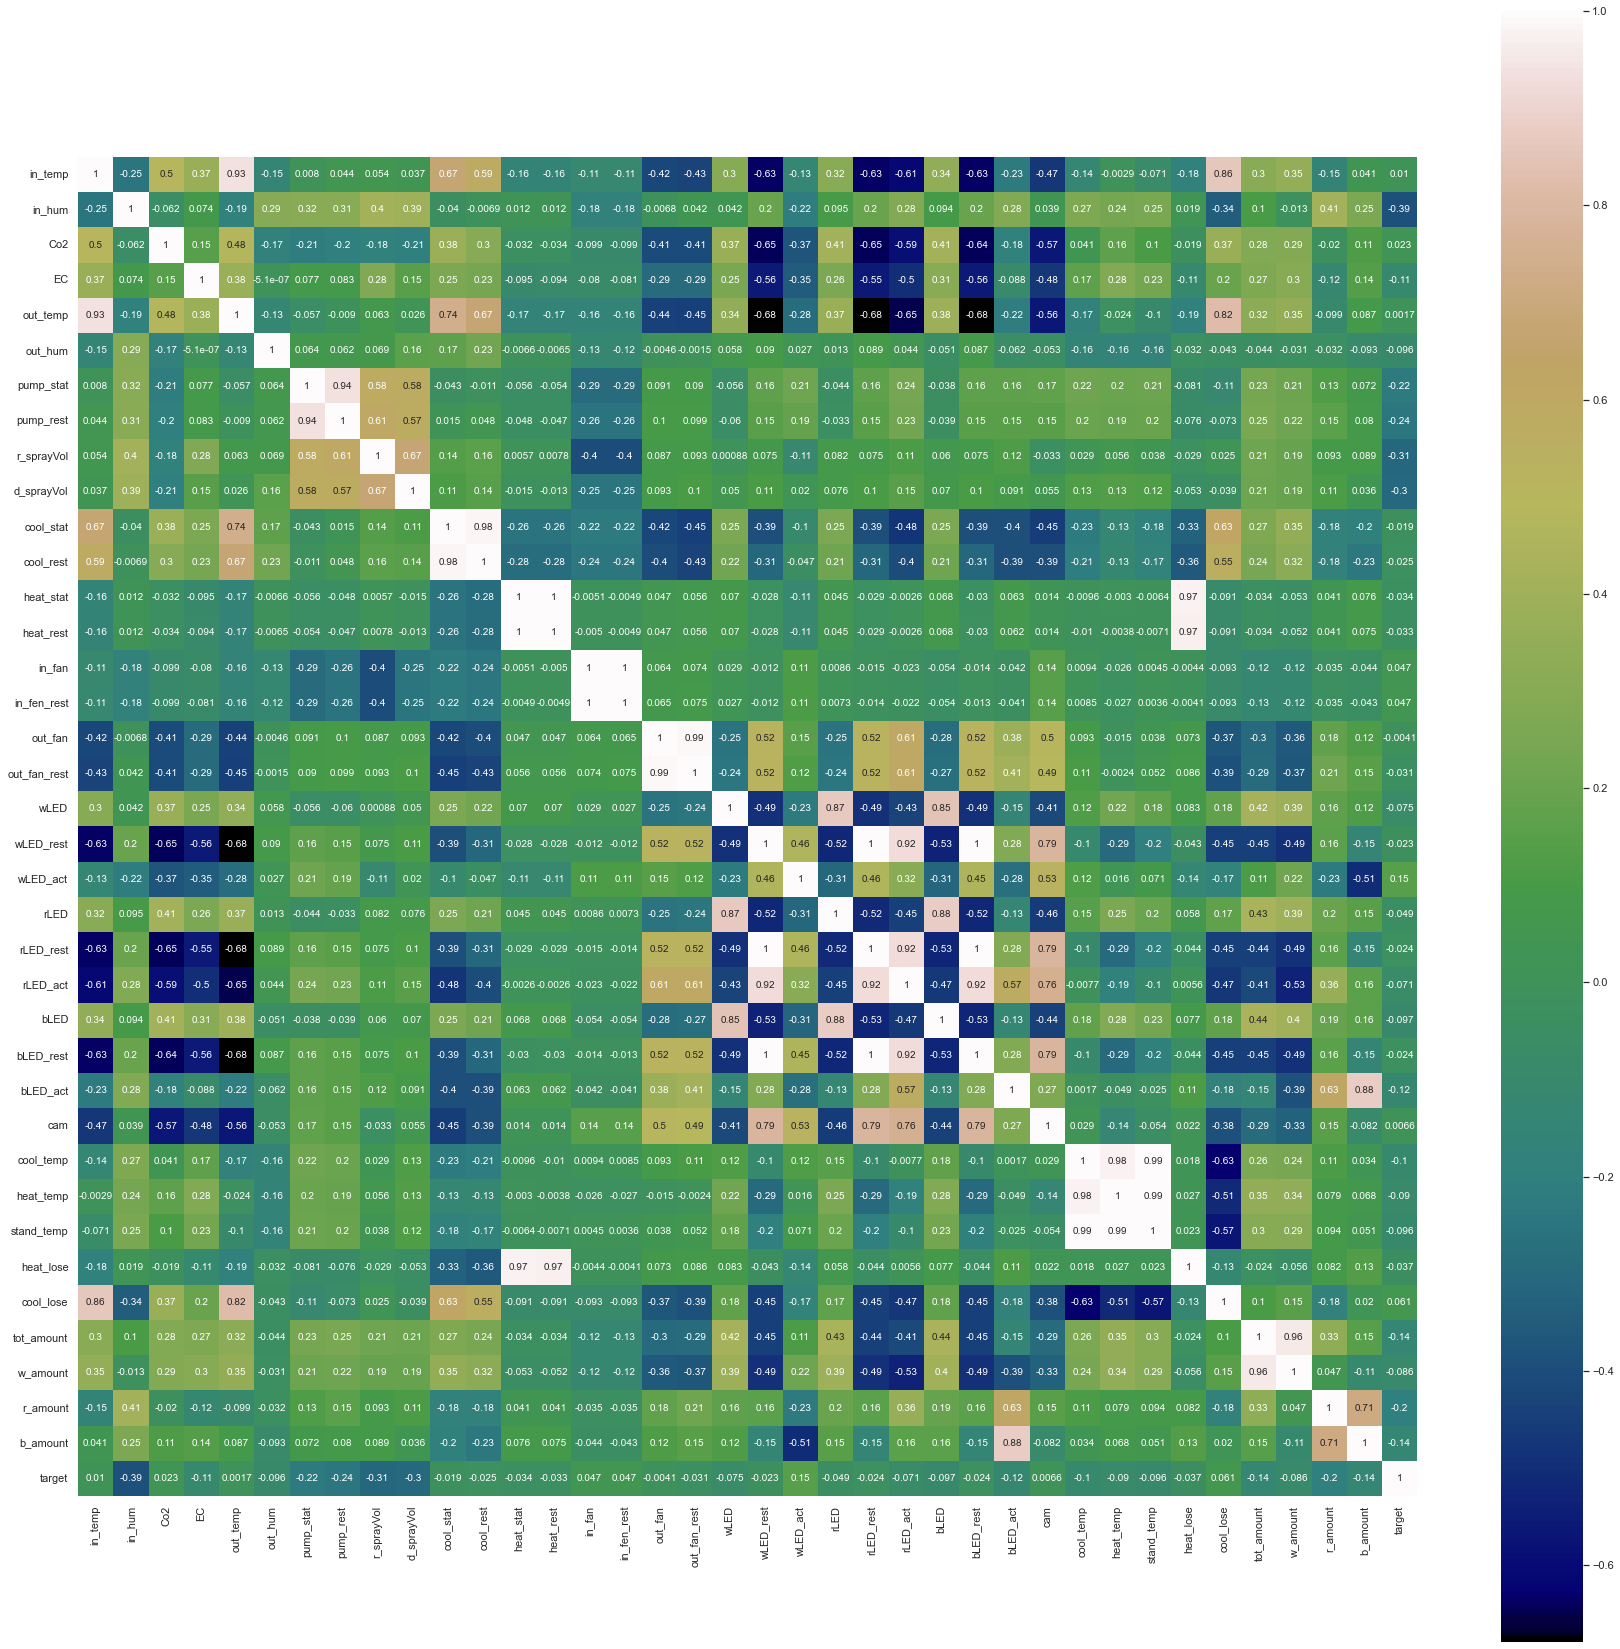

In [94]:
# object객체인 시간을 제외한 컬럼들의 상관관계 시각화
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(df.corr(), vmax=1.0, square=True,cmap=plt.cm.gist_earth,
            linecolor='w', annot=True, annot_kws={'size':10})
plt.show()

- 각 피쳐들끼리 상관관계가 큰것은 많으나 타깃과 눈에띄게 상관관계를 뛰는 피쳐ㅇ는 없음
- 실내습도와, 분무량이 음의 상관관계를 뛴다고 볼수 있는 편인듯 그럼 이 3개를 가지고 선형분석을 시행할거임

# 분석
## 데이터셋 ㅜㄴ리

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [102]:
# 스케일 할 데이터
data = df[['in_hum', 'r_sprayVol','d_sprayVol']]
ss = StandardScaler()
scaled = ss.fit_transform(data)

In [103]:
# 분리
X_train, X_test, y_train, y_test = train_test_split(
scaled, df['target'], test_size=0.2, random_state=109)

In [104]:
X_train.shape, X_test.shape

((184, 3), (46, 3))

## 선형회귀분석

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
# instance
lrr = LinearRegression()
#fitting
lrr.fit(X_train, y_train)

LinearRegression()

In [107]:
# 예측
y_pred = lrr.predict(X_test)

In [108]:
mse= mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
rr = r2_score(y_test, y_pred)
print('mse:{0:.3f}, rmse:{1:.3f}'.format(mse, rmse))
print('R2계수:{0:.3f}'.format(rr))

mse:0.084, rmse:0.290
R2계수:-0.069


In [109]:
# 절편, 회귀계수
lrr.intercept_, lrr.coef_

(0.26970086037885754, array([-0.10581866, -0.07454319, -0.00733153]))

In [111]:
# 어떤 피쳐의 계수인지
coef = pd.Series(np.round(lrr.coef_,4), index = data.columns)
coef

in_hum       -0.1058
r_sprayVol   -0.0745
d_sprayVol   -0.0073
dtype: float64

- 청경채 성장 예측 회귀식
 - Y = -0.1058*in_hum -0.0745*r_sv -0.0073*d_sv + 0.2697

<AxesSubplot:xlabel='d_sprayVol', ylabel='target'>

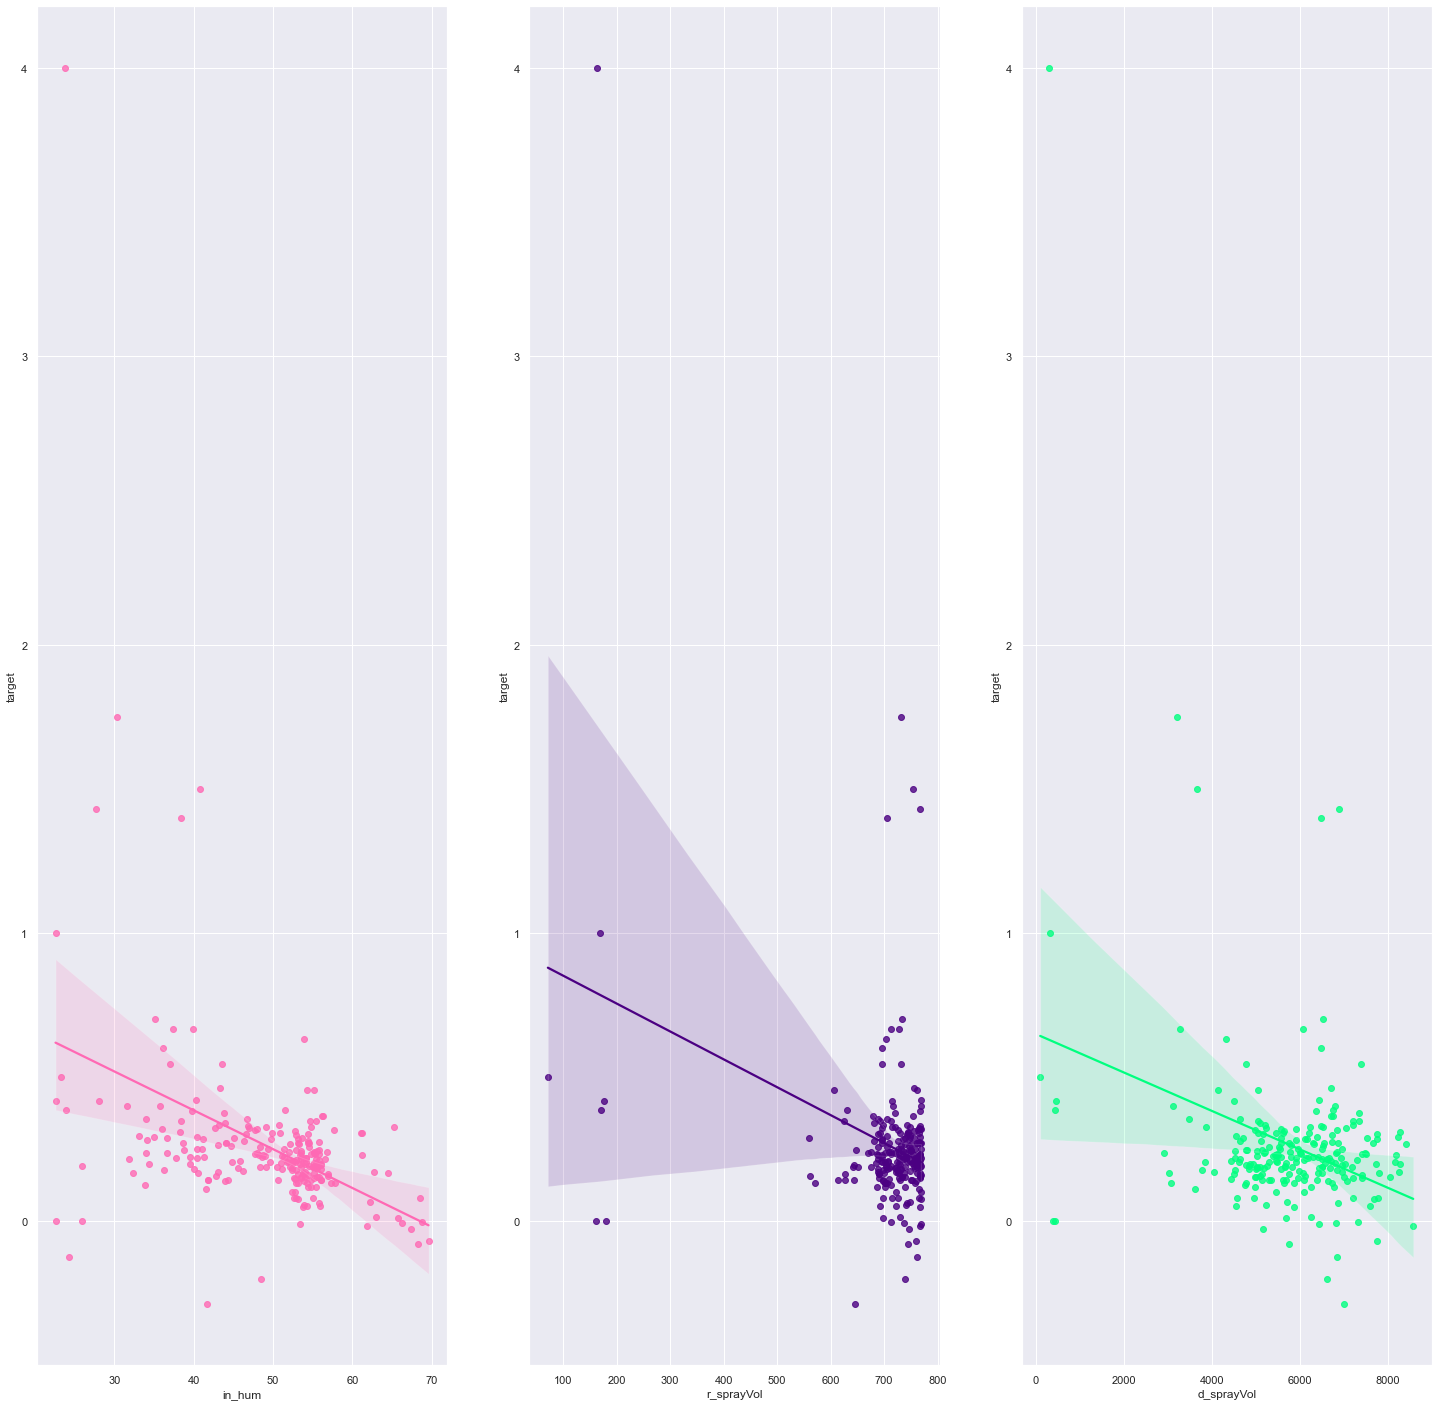

In [112]:
fig, axs = plt.subplots(figsize=(25,25), ncols=3, nrows=1)
sns.regplot(x='in_hum', y='target',data=df, color='hotpink', ax =axs[0])
sns.regplot(x='r_sprayVol', y='target',data=df, color='indigo', ax=axs[1])
sns.regplot(x='d_sprayVol', y='target',data=df, color='springgreen', ax=axs[2])